<center>
# A laboratory work contains data preprocessing, 2 variants of cross-validation and the choice of optimal parameter for the Minkowski metric
</center>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Using Titanic dataset from https://www.kaggle.com/c/titanic/data for demonstration of preprocessing and kNN method

In [4]:
data = pd.read_csv('titanic/passenger_data.csv', sep = ',', engine = 'python')

In [5]:
#data

#### Demonstration of depedencies of features

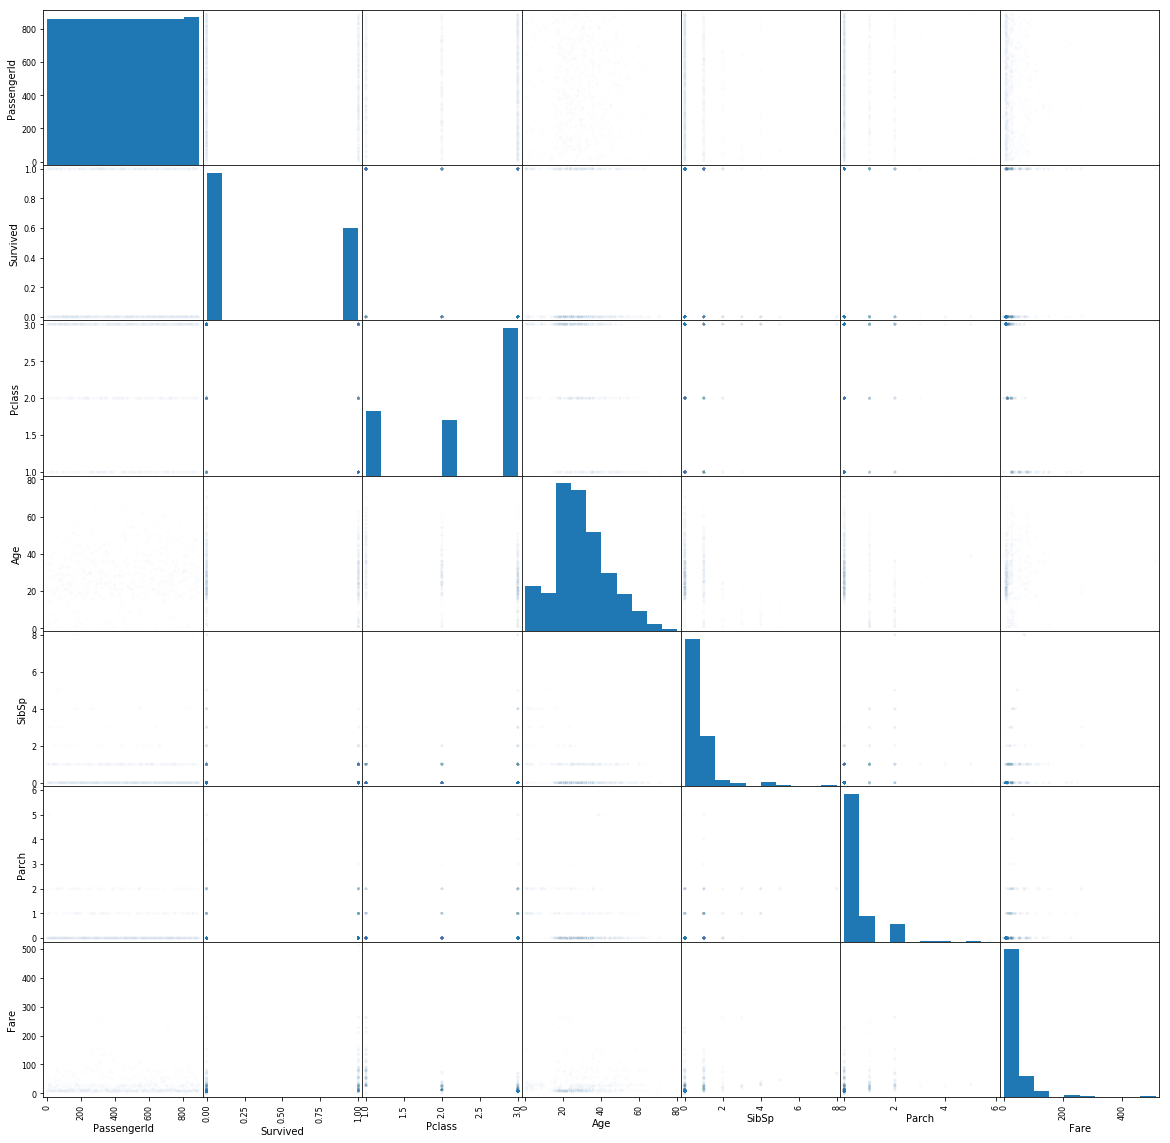

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

#### Cleaning dataset, excluding non-necessary features

In [7]:
data = data.drop("Name", axis = 1)
data = data.drop("PassengerId", axis = 1)

In [8]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Sex', 'Ticket', 'Cabin', 'Embarked']
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [9]:
# for c in categorical_columns:
#     print(c, data[c].unique())

In [10]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [11]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [12]:
data.describe(include = [object])

,Sex,Ticket,Cabin,Embarked
count,891,891,891,891
unique,2,681,147,3
top,male,CA. 2343,B96 B98,S
freq,577,7,691,646


#### Binarisation of text feature

In [13]:
data.at[data['Sex'] == 'male', 'Sex'] = 0
data.at[data['Sex'] == 'female', 'Sex'] = 1
data['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [14]:
#data

In [15]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Ticket', 'Cabin', 'Embarked']


In [16]:
binary_columns.append('Survived')

In [17]:
print(binary_columns, nonbinary_columns)

['Sex', 'Survived'] ['Ticket', 'Cabin', 'Embarked']


#### Vectorization

In [18]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print(data_nonbinary.columns)

In [19]:
numerical_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
numerical_columns.remove("Survived")

In [21]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


#### Standartization of numerical features

In [22]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00


#### Concatination of all features in a single table
#### Splitting matrix of features and target vector

In [23]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
#print(data.shape)
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Sex,Survived
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16,0.003367,0.003367,0.002245,0.001122,0.001122,...,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.725028,0.352413,0.383838
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.057961,0.057961,0.047351,0.033501,0.033501,...,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.446751,0.477990,0.486592
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
X = data.drop(('Survived'), axis = 1)
y = data['Survived']
feature_names = X.columns

#### Single fitting kNN

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 


In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [209]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.17656500802568217 0.208955223880597


In [210]:
err_test = 1 - knn.score(X_test, y_test)

#### An error of kNN method

In [211]:
err_test

0.20895522388059706

#### Cross-validation via grid of neighbors
#### and choising best amounth of neighbors

In [212]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1910112359550562 10


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [213]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17656500802568217 0.208955223880597


#### A confusion matrix demonstrated below

In [214]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))


[[146  11]
 [ 45  66]]


#### Another variant of cross-validation may be realized via cross_val_score function:

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = k)
    tmp_scores = cross_val_score(knn, X, y, cv=kf.split(X), scoring='accuracy')
    tmp_scores = tmp_scores.mean()
    print(k, tmp_scores)
    scores.append(tmp_scores)

1 0.742996254681648
2 0.7653807740324594
3 0.7901123595505618
4 0.7777528089887641
5 0.7957178526841449
6 0.7912234706616729
7 0.8046566791510612
8 0.7968289637952559
9 0.7911985018726593
10 0.7979400749063671
11 0.8012858926342072
12 0.8035330836454431
13 0.7956679151061175
14 0.8046691635455681
15 0.8012983770287141
16 0.8114107365792759
17 0.8057927590511861
18 0.8035455680399501
19 0.8024344569288389
20 0.8035455680399501
21 0.8024469413233458
22 0.8058052434456929
23 0.8080524344569289
24 0.810287141073658
25 0.8102996254681647
26 0.810287141073658
27 0.8125218476903869
28 0.80916354556804
29 0.815892634207241
30 0.8102746566791511
31 0.8114232209737828
32 0.8035580524344569
33 0.8058052434456927
34 0.800174781523096
35 0.800187265917603
36 0.7956803995006243
37 0.7923096129837703
38 0.7900749063670414
39 0.7878401997503122
40 0.7811485642946318
41 0.7789138576779027
42 0.7755430711610487
43 0.7744194756554308
44 0.7699250936329587
45 0.7699250936329588
46 0.7631960049937577
47 0.

#### optimal K for KNN was found:

In [108]:
opt_nightbors = scores.index(max(scores))+1
opt_nightbors

29

In [109]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(X_train, y_train)

In [110]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.18459069020866772 0.19402985074626866


#### Lets try to find an optimal parameter *p* in the Minkowski metric
# $$\rho_p=\left(\sum|x_j-z_j|^p\right)^\frac{1}{p}$$
#### with fixed optimal amount of neighbors

In [140]:
p_mink_values= np.linspace(1, 5, 50)
p_mink_values = list(p_mink_values)

In [141]:
scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for p in p_mink_values:
    knn = KNeighborsClassifier(n_neighbors=opt_nightbors, metric='minkowski', p = p)
    tmp_scores = cross_val_score(knn, X, y, cv=kf.split(X), scoring='neg_mean_squared_error')
    tmp_scores = tmp_scores.mean()
    print(p_mink_values.index(p), tmp_scores)
    scores.append(tmp_scores)


0 -0.1851685393258427
1 -0.18068664169787765
2 -0.18405742821473156
3 -0.1806991260923845
4 -0.18295880149812732
5 -0.18295880149812732
6 -0.18295880149812732
7 -0.1852059925093633
8 -0.1852059925093633
9 -0.18521847690387017
10 -0.18634207240948814
11 -0.18410736579275905
12 -0.18410736579275905
13 -0.18072409488139826
14 -0.18409488139825217
15 -0.186354556803995
16 -0.18635455680399501
17 -0.18747815230961298
18 -0.186354556803995
19 -0.18523096129837702
20 -0.18523096129837702
21 -0.18523096129837702
22 -0.18410736579275905
23 -0.18410736579275905
24 -0.18410736579275905
25 -0.18410736579275905
26 -0.18523096129837702
27 -0.186354556803995
28 -0.18860174781523092
29 -0.18860174781523092
30 -0.1908489388264669
31 -0.1919725343320849
32 -0.1919725343320849
33 -0.1919725343320849
34 -0.1953433208489388
35 -0.19421972534332083
36 -0.1964669163545568
37 -0.1964669163545568
38 -0.1964669163545568
39 -0.19759051186017476
40 -0.19759051186017476
41 -0.19759051186017476
42 -0.19646691635455

#### optimal parameter in Minkowski metric is

In [144]:
p_opt = p_mink_values[scores.index(max(scores))]
p_opt

1.0816326530612246

#### Lets train model with kNN using optimal n_neighbors and p:

In [145]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors, metric='minkowski', p = p_opt).fit(X_train, y_train)

#### Error values is 

In [146]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17335473515248795 0.20149253731343283
